This Jupyter Notebook exercise is designed based on the **ESSE 1012** lecture material. It covers the general multi-layer radiative equilibrum model, the 2-layer radiative model used to study the greenhouse effect of water vapor, and the vertical pressure distribution using the barometric equation.

---

# ESSE 1012: Atmospheric Physics & Radiative Models

### Key Concepts from Lecture

* 
**Scale Height ($H$):** The vertical distance over which atmospheric pressure decreases by a factor of $e$. For water vapor, $H_w \approx 2\text{ km}$.


* 
**Radiative Equilibrium:** A state where incoming solar radiation is balanced by outgoing infrared (IR) radiation, and temperatures are not changing.


* 
**Barometric Equation:** $P(z) = P(0) \exp(-z/H)$.


* 
**Adiabatic Lapse Rate ($\Gamma$):** The rate at which a rising air parcel cools ($\approx 10\text{ K/km}$).



---

## Part 0: General Multi-Layer Radiative Equilibrium Model

In a multi-layer radiative model, we assume the atmosphere consists of  layers, each thick enough to be opaque to infrared (IR) radiation ($a=1$). The temperature of each layer is determined by the balance between absorbed and emitted IR flux.

### Mathematical Generalized Solution

From the model assumptions:

* **Top Layer ($T_1$):** Must balance incoming solar radiation, so $T_1 = T_e = 255 \text{ K}$.

* **Any Layer $n$:** The temperature of the $n$-th layer (counting from the top down) is given by:
$$T_n = \sqrt[4]{n} \times T_e$$

* **Surface Temperature ($T_g$):** The ground temperature is given by:
$$T_g = \sqrt[4]{1 + n} \times T_e$$


### Python Implementation for Generalized Model

In [47]:
import numpy as np

def compute_multilayer_temps(num_layers, Te=255.0):
    """
    Computes temperatures for an n-layer radiative equilibrium model.
    num_layers: Total number of atmospheric layers
    Te: Effective radiating temperature (default 255 K)
    """
    results = {}
    
    # Calculate each layer's temperature (T_n = n^(1/4) * Te)
    # Layer 1 is at the top of the atmosphere
    for n in range(1, num_layers + 1):
        results[f'Layer {n}'] = (n**(0.25)) * Te
        
    # Calculate Ground Temperature (Tg = (1 + n)^(1/4) * Te)
    results['Ground (Tg)'] = ((1 + num_layers)**(0.25)) * Te
    
    return results

# Example: Display results for a 2-layer model (standard for Earth water vapor model)
# You may change n_layers to see how the temperatures change
n_layers = 2
model_temps = compute_multilayer_temps(n_layers)

print(f"--- {n_layers}-Layer Radiative Model Results ---")
for location, temp in model_temps.items():
    print(f"{location}: {temp:.2f} K")

--- 2-Layer Radiative Model Results ---
Layer 1: 255.00 K
Layer 2: 303.25 K
Ground (Tg): 335.60 K


### Important Discussion Point: The Greenhouse Effect

This model demonstrates the fundamental mechanism of the greenhouse effect: as the number of layers ($n$) increases (representing more greenhouse gases like $CO_2$, $CH_4$, or $H_2O$ absorbing IR radiation), the surface temperature $T_g$ also increases. For a simple 2-layer Earth model, this yields a surface temperature of approximately **335 K**.

## Part 2: 2-Layer Radiative Model for Water Vapor

In this model, the atmosphere is divided into layers thick enough to be opaque to IR radiation. We assign temperatures to the middle of each layer and use the scale height of water vapor ($H_w$) to determine their altitudes.

Mathematical Model:
* **Skin layer:** represented by the tropopause (12 km - 14 km) where the lapse rate is zero. The Skin Temperature ($T_s$) calculation assumes that a thin, high-altitude layer absorbs a very small fraction of incident radiation2. Under radiative equilibrium, this is expressed as $T_s^4 = \frac{1}{2} T_e^4$, resulting in $T_s \approx 214\text{ K}$ when $T_e = 255\text{ K}$.
* **Layer 1 (Top):**  in the middle, $P_w=\frac{1}{4} P_w(0)$ , $T_1 = T_e = 255\text{ K}$ at $z_1 = -H_w \ln(1/4) \approx 2.8\text{ km}$.
* **Layer 2 (Bottom):** in the middle, $P_w=\frac{3}{4} P_w(0)$ , $T_2 = \sqrt[4]{2} T_e \approx 303\text{ K}$ at $z_2 = -H_w \ln(3/4) \approx 0.6\text{ km}$.
* **Surface:**  $T_g = \sqrt[4]{3} T_e \approx 335\text{ K}$ at $z = 0\text{ km}$.

Observed Atmosphere:
* **Surface Temperature:** $T_0 = 288.15 K$.
* **Lapse rate:** $\Gamma = 6.5 K/km$.
* **Tropapause:** isothermal from 12 km - 14 km, $T=constant$.

**Lapse rate** $\Gamma$ is defined as the $\it{negative}$ change in temperature over the change in height:
$$\Gamma = -\frac{\Delta T}{\Delta z} = -\frac{T_{upper} - T_{lower}}{z_{upper} - z_{lower}}$$
In this 2-layer model, we also calculate the lapse rate for each layer from the surface to the top of the tropopause.


Altitude z1 (Layer 1 middle): 2.77 km
Altitude z2 (Layer 2 middle): 0.58 km
Computed Skin Temperature: 214.43 K


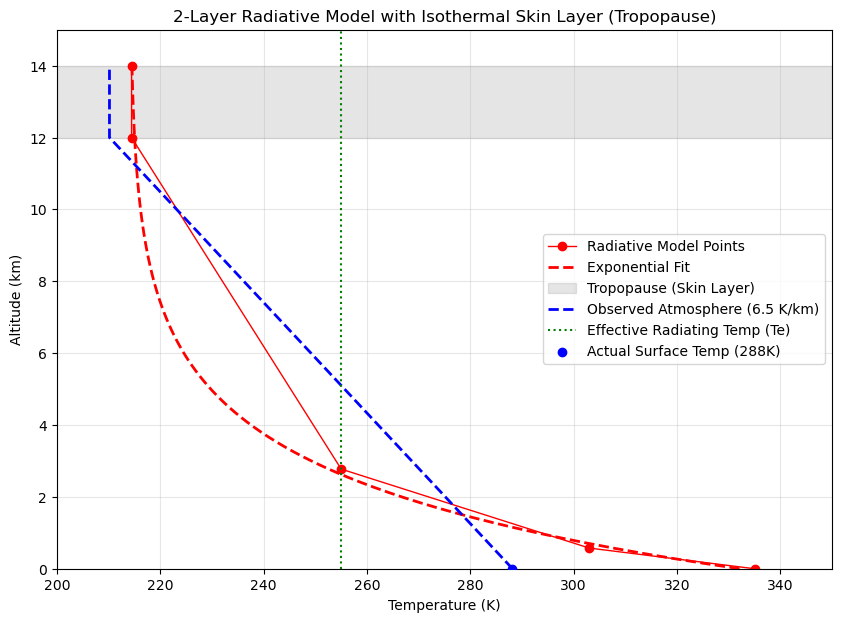

Layer Transition          | Lapse Rate (K/km)   
--------------------------------------------------
Surface to Layer 2        |              55.62
Layer 2 to Layer 1        |              21.85
Layer 1 to Tropo Base     |               4.40
Within Tropopause         |              -0.00


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- 1. Compute height for each model level ---
def compute_altitude(pressure_ratio, Hw=2.0):
    """
    Computes altitude (z) based on the ratio of pressure P(z)/P(0)
    Hw: Scale height for water vapor (default ~2.0 km)
    """
    return -Hw * np.log(pressure_ratio)

# Constants from lecture
Hw = 2.0  # Scale height for water vapor in km 

# Define Tropopause/Skin Layer boundaries as requested
z_tropopause_base = 12.0
z_tropopause_top = 14.0

# Compute Layer 1 and 2 midpoint (z1) 
# Corresponds to a pressure ratio P(z1)/P(0) = 1/4, P(z2)/P(0) = 3/4 
z1 = compute_altitude(1/4, Hw)
z2 = compute_altitude(3/4, Hw)

print(f"Altitude z1 (Layer 1 middle): {z1:.2f} km")
print(f"Altitude z2 (Layer 2 middle): {z2:.2f} km")

# --- 2. Calculate Skin Temperature ---
Te = 255.0  # Effective radiating temperature (K)
Ts = Te / (2**(1/4))  # Ts^4 = 1/2 * Te^4
print(f"Computed Skin Temperature: {Ts:.2f} K")

# --- 3. Building the Profile ---
# Altitudes: Surface, Layer 2, Layer 1, Tropopause Base, Tropopause Top
z_profile = np.array([0, z2, z1, z_tropopause_base, z_tropopause_top])

# Temperatures: Tg, T2, T1, Ts (constant through tropopause)
# Tg=335K, T2=303K, T1=255K, Ts=214K from Part 1 above
t_profile = np.array([335, 303, Te, Ts, Ts])

# --- 4. Exponential Curve Fitting ---
# Define a decreasing exponential decay function
def exp_func(z, a, b, c):
    # Use np.clip to prevent the overflow error during the search process
    return a * np.exp(-np.clip(b * z, -10, 10)) + c
# Initial guess: [Scale, Decay rate, Offset]
guess = [120, 0.2, 214]
z_smooth = np.linspace(0, 14, 100)

# Fit the function to your 5 points
params, _ = curve_fit(exp_func, z_profile, t_profile, p0=guess)
t_exp = exp_func(z_smooth, *params)

# --- 5. Observed Atmosphere Data ---
# Troposphere: decreases at 6.5 K/km starting from 288.15 K
z_std = np.linspace(0, 12, 100)
t_std = 288.15 - (6.5 * z_std)

# Add an isothermal tropopause for the observed atmosphere to match your model
z_std_full = np.append(z_std, [14.0])
t_std_full = np.append(t_std, [t_std[-1]])

# --- 6. Visualization ---
plt.figure(figsize=(10, 7))

# Plot the Radiative Model profile
plt.plot(t_profile, z_profile, 'r-o', linewidth=1, label='Radiative Model Points')
plt.plot(t_exp, z_smooth, 'r--', linewidth=2, label='Exponential Fit')

# Fill the Tropopause/Skin Layer area
plt.axhspan(z_tropopause_base, z_tropopause_top, color='gray', alpha=0.2, label='Tropopause (Skin Layer)')

# Plot Standard Atmosphere
plt.plot(t_std_full, z_std_full, 'b--', linewidth=2, label='Observed Atmosphere (6.5 K/km)')

# Add markers for Te (255 K) and Tg (288 K)
plt.axvline(255, color='green', linestyle=':', label='Effective Radiating Temp (Te)')
plt.scatter([288.15], [0], color='blue', zorder=5, label='Actual Surface Temp (288K)')

# Formatting
plt.title('2-Layer Radiative Model with Isothermal Skin Layer (Tropopause)')
plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (km)')
plt.ylim(0, 15)
plt.xlim(200, 350)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


# --- 7. Compute Layer-by-Layer Lapse Rates ---
labels = ["Surface to Layer 2", "Layer 2 to Layer 1", "Layer 1 to Tropo Base", "Within Tropopause"]

print(f"{'Layer Transition':<25} | {'Lapse Rate (K/km)':<20}")
print("-" * 50)

for i in range(len(z_profile) - 1):
    dT = t_profile[i+1] - t_profile[i]
    dz = z_profile[i+1] - z_profile[i]
    gamma = -dT / dz
    print(f"{labels[i]:<25} | {gamma:>18.2f}")

**Discussion Point:** 
* Notice that the radiative model predicts a surface temperature ($335\text{ K}$) much higher than reality ($288\text{ K}$). This is because the radiative-only model is **convectively unstable**; in the real atmosphere, convection and latent heat release smooth out this profile to the standard $6.5\text{ K/km}$ lapse rate.
* **Why $T_s$ is lower than $T_1$?**
  Even though Layer 1 is already cold ($255\text{ K}$), the skin layer is even colder ($214\text{ K}$). This is because the skin layer only receives radiation from one direction (below), whereas internal atmospheric layers receive and exchange radiation from both above and below6666. This creates the characteristic "cooling" effect observed at the very top of the radiative-convective atmosphere7.

## Part 3: Pressure Distribution up to 40 km

We use the Barometric Equation to model how pressure drops as we move through the troposphere and into the stratosphere.
 $$P(z) = P_0 \exp\left(-\frac{z}{H}\right)$$

**Exercise:** Compute the pressure at heights up to  assuming an average scale height $H_{avg}$. To calculate the half-mass point (the altitude where 50% of the atmosphere's mass is below you), we solve for the height where pressure is exactly half of the surface pressure ($P(z) = 0.5 P_0$). This height is $z = H \ln(2) \approx 0.693 H$.

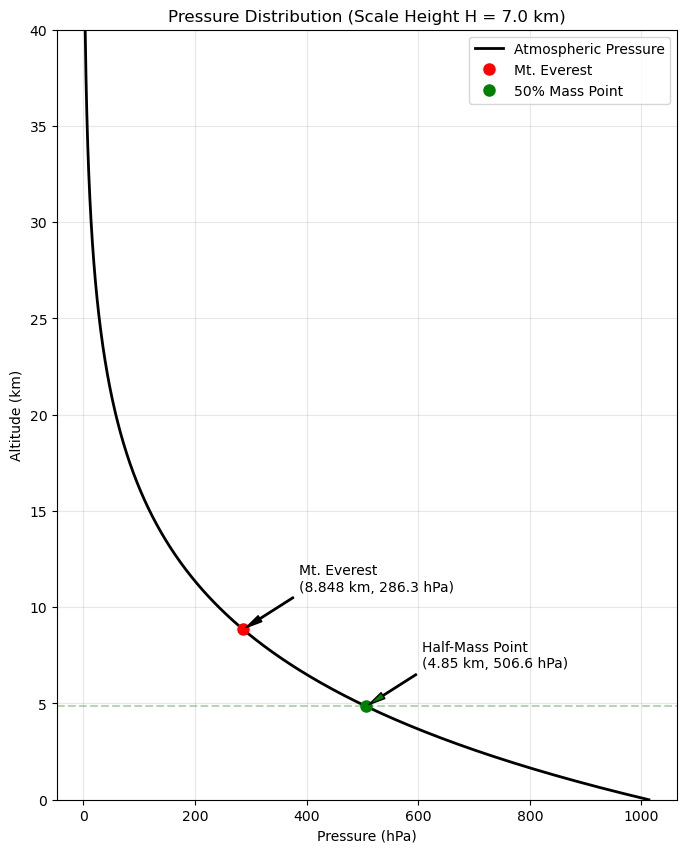

The 50% mass point is located at: 4.85 km


In [44]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Parameters
P0 = 1013.25  # Surface pressure (hPa)
H_avg = 7.0   # Average scale height (km)
z_everest = 8.848 # km

# 2. Compute Specific Points
# Half-mass point: Solve 0.5 = exp(-z/H) -> z = H * ln(2)
z_half = H_avg * np.log(2)
p_half = P0 * 0.5

# Everest pressure
p_everest = P0 * np.exp(-z_everest / H_avg)

# 3. Generate Profile Data
z = np.linspace(0, 40, 500)
P_z = P0 * np.exp(-z / H_avg)

# 4. Plotting
plt.figure(figsize=(8, 10))
plt.plot(P_z, z, 'k-', lw=2, label='Atmospheric Pressure')

# Mark Mt. Everest (Red)
plt.plot(p_everest, z_everest, 'ro', markersize=8, label='Mt. Everest')
plt.annotate(f'Mt. Everest\n({z_everest} km, {p_everest:.1f} hPa)', 
             xy=(p_everest, z_everest), xytext=(p_everest + 100, z_everest + 2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

# Mark Half-Mass Point (Green)
plt.plot(p_half, z_half, 'go', markersize=8, label='50% Mass Point')
plt.annotate(f'Half-Mass Point\n({z_half:.2f} km, {p_half:.1f} hPa)', 
             xy=(p_half, z_half), xytext=(p_half + 100, z_half + 2),
             arrowprops=dict(facecolor='green', shrink=0.05, width=1, headwidth=5))

# Visual aids
plt.axhline(z_half, color='g', linestyle='--', alpha=0.3)
plt.title(f"Pressure Distribution (Scale Height H = {H_avg} km)")
plt.xlabel('Pressure (hPa)')
plt.ylabel('Altitude (km)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim(0, 40)
plt.show()

print(f"The 50% mass point is located at: {z_half:.2f} km")

**Exercise Question:** At the summit of Mount Everest, roughly what percentage of the total atmospheric mass is *below* you? (Hint: Pressure is a measure of the weight of the air mass above a unit area $1 m^2$).